# Tutorial 4: Effective Data Visualization 

### Lecture and Tutorial Learning Goals:

Expand your data visualization knowledge and tool set beyond what we have seen and practiced so far. We will move beyond scatter plots and learn other effective ways to visualize data, as well as some general rules of thumb to follow when creating visualizations. All visualization tasks this week will be applied to real world data sets. Remember, it is an iterative process to answer questions and each step taken should have a good reason behind it.  

After completing this week's lecture and tutorial work, you will be able to:

- Describe when to use the following kinds of visualizations:
    - scatter plots
    - line plots
    - bar plots
    - histogram plots
- Given a dataset and a question, select from the above plot types to create a visualization that best answers the question
- Given a visualization and a question, evaluate the effectiveness of the visualization and suggest improvements to better answer the question
- Identify rules of thumb for creating effective visualizations
- Define the three key aspects of ggplot objects:
    - aesthetic mappings
    - geometric objects
    - scales
- Use the `ggplot2` library in R to create and refine the above visualizations using:
    - geometric objects: `geom_point`, `geom_line`, `geom_histogram`, `geom_bar`, `geom_vline`, `geom_hline`
    - scales: `scale_x_continuous`, `scale_y_continuous`
    - aesthetic mappings: `x`, `y`, `fill`, `colour`, `shape`
    - labelling: `xlab`, `ylab`, `labs`
    - font control and legend positioning: `theme`
    - subplots: `facet_grid`
- Describe the difference in raster and vector output formats
- Use `ggsave` to save visualizations in `.png` and `.svg` format

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Replace `fail()` with your completed code and run the cell!

This worksheet covers parts of [the Visualization chapter](https://datasciencebook.ca/viz.html) of the online textbook. You should read this chapter before attempting the worksheet.

In [2]:
### Run this cell before continuing. 

library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




**Question 0.1** 
<br> {points: 1}

Match the following definitions with the corresponding aesthetic mapping or function used in R:

*Definitions*

A. Prevents a chart from being stacked. It preserves the vertical position of a plot while adjusting the horizontal position. 

B. In bar charts, this aesthetic fills in the bars by a specific colour or separates the counts by a variable different from the x-axis. 

C. In bar charts, it outlines the bars but in scatterplots, it fills in the points (colouring them based on a particular variable aside from the x/y-axis). 

D. This makes the height of each bar equal to the number of cases in each group, and it is incompatible with mapping values to the y aesthetic. This stat basically allows the y-axis to represent particular values from the data instead of just counts. 

E. This aesthetic allows further visualization of data by varying data points by shape (modifying their shape based on a particular variable aside from the x/y-axis).

F. Labels the y-axis. 


*Aesthetics and Functions*

1. `colour`
2. `dodge`
3. `fill`
4. `identity`
5. `ylab`
6. `shape`

For every description, create an object using the letter associated with the definition and assign it to the corresponding number from the list above. For example: `B <- 1`

In [2]:
A <- 2
B <- 3
C <- 1
D <- 4
E <- 6
F <- 5

In [3]:
test_0.1()

Test passed 🌈
[1] "Success!"


**Question 0.2** True or False:
<br> {points: 1}

We should save a plot as an `.svg` file if we want to be able to rescale it without losing quality.

*Assign your answer to an object called `answer0.2`. Make sure your answer is in lowercase letters and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [6]:
answer0.2 <- "true"

In [7]:
test_0.2()

Test passed 🥳
[1] "Success!"


## 1. Data on Personal Medical Costs 

As we saw in the worksheet, data scientists work in all types of organizations and with all kinds of problems. One of these types of organizations are companies in the private sector that work with health data. Today we will be looking at data on personal medical costs. There are varying factors that affect health and consequently medical costs. Our goal for today is to determine how are variables related to the medical costs billed by health insurance companies. 


To analyze this, we will be looking at a dataset that includes the following columns:

* `age`: age of primary beneficiary
* `sex`: insurance contractor gender: female, male
* `bmi`: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/$m^{2}$) using the ratio of height to weight, ideally 18.5 to 24.9
* `children`: number of children covered by health insurance / number of dependents
* `smoker`: smoking
* `region`: the beneficiary's residential area in the US: northeast, southeast, southwest, northwest.
* `charges`: individual medical costs billed by health insurance

*This dataset, was taken from the [collection of Data Sets](https://github.com/stedy/Machine-Learning-with-R-datasets) created and curated for the [Machine Learning with R](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-r) book by Brett Lantz.*

**Question 1.1** Yes or No: 
<br> {points: 1}

Based on the information given in the cell above, do you think the column `charges` includes quantitative/numerical data? 

*Assign your answer to an object called `answer1.1`. Make sure your answer is written in lowercase and is surrounded by quotation marks (e.g. `"yes"` or `"no"`).*

In [12]:
answer1.1 <- "yes"

In [13]:
test_1.1()

Test passed 🎉
[1] "Success!"


**Question 1.2** Multiple Choice:
<br> {points: 1}

Assuming overplotting is not an issue, which plot would be the most effective to compare the relationship of `age` and `charges`?

A. Scatterplot 

B. Stacked Bar Plot 

C. Bar Plot 

D. Histogram 

*Assign your answer to an object called `answer1.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [14]:
answer1.2 <- "A"

In [15]:
test_1.2()

Test passed 🥳
[1] "Success!"


**Question 1.3**
<br> {points: 1}

Read the `insurance.csv` file in the `data/` folder and use `tail` to view the last 6 individuals presented. 

*Assign your answer to an object called `insurance`.*

In [47]:
insurance <- read_csv("data/insurance.csv")
tail(insurance) # preview the last 6 rows of the data set

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
52,female,44.70,3,no,southwest,11411.685
50,male,30.97,3,no,northwest,10600.548
18,female,31.92,0,no,northeast,2205.981
18,female,36.85,0,no,southeast,1629.833
21,female,25.80,0,no,southwest,2007.945
61,female,29.07,0,yes,northwest,29141.360


In [48]:
test_1.3()

Test passed 🎊
Test passed 🎉
Test passed 🎊
Test passed 🥇
[1] "Success!"


**Question 1.4** 
<br> {points: 3}

Looking over the loaded data shown above, what observations can you make about the relationship between medical charges and age? How about medical charges and BMI? Finally, what about medical charges and smoking? 

Also, comment on whether our observations might change if we visualize the data? And/or whether visualizing the data might allow us to more easily make observations about the relationships in the data as opposed to trying to make them directly from the data table?

Answer in the cell below.

medical charges and bmi - bmi and medical charges have no apparent correlation as they show no indication of patterning

medical charges and age - younger people typically under 25 have lower medical charges while those who are older typically over 50 have noticably higher medical charges

medical charges and smoking - from the loaded data there is only one person who is a smoker and while they have a noticably higher medical charge it is not suffient to say smoking is the reason for this as there is so while they have higher medical charges we would need to visuallize a larger data set to be for certain (same goes for the other obersvations to be more certain)


**Question 1.5**
<br> {points: 1}

According to the National Heart, Lung and Blood Institute of the US: "The higher your BMI, the higher your risk for certain diseases such as heart disease, high blood pressure, type 2 diabetes, gallstones, breathing problems, and certain cancers". 

Based on this information, we can hypothesize that individuals with a higher BMI are likely to have more medical costs. Let's use our data and see if this holds true. Create a scatter plot of `charges` (y-axis) versus `bmi` (x-axis).

In the scaffolding we provide below, we suggest that you set `alpha` to a value between 0.2 and 0.4. `alpha` sets the transparency of points on a scatter plot, and increasing transparencing of points is one tool you can use to deal with over plotting issues.

*Assign your answer to an object called `bmi_plot`. Make sure to label your axes appropriately.*

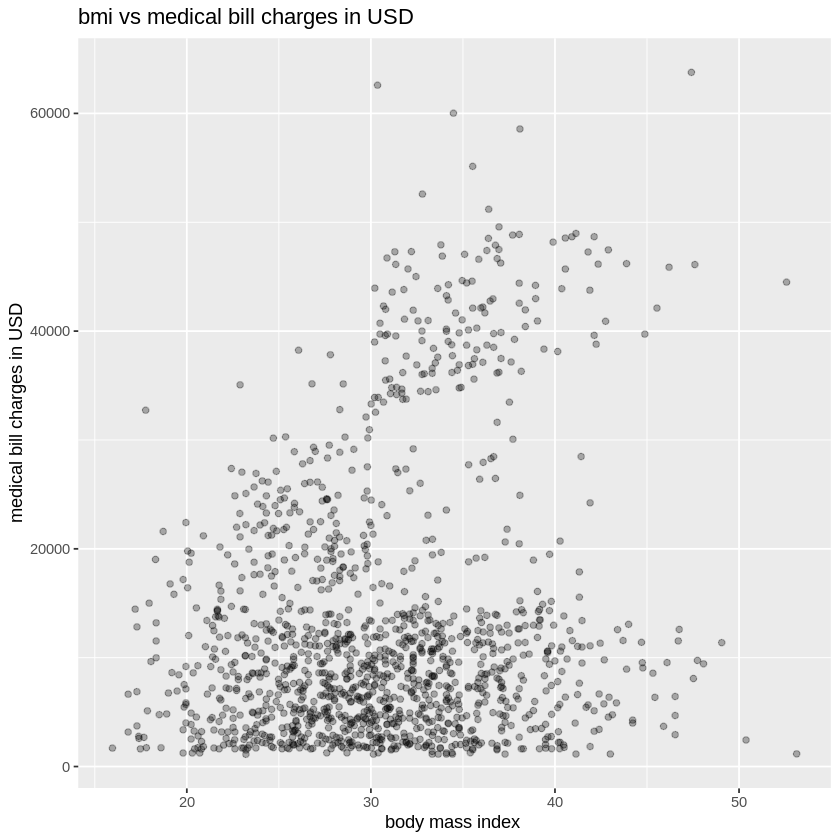

In [49]:
options(repr.plot.width = 7, repr.plot.height = 7) #Remember to set your plot sizes to an appropiate size

bmi_plot <- insurance |>
    ggplot(aes(x = bmi, y = charges)) + 
        geom_point(alpha = 0.3) + # Deals with the transparency of the points, set it to an appropiate value
        xlab("body mass index ") +
        ylab("medical bill charges in USD") +
        ggtitle("bmi vs medical bill charges in USD")

bmi_plot

In [50]:
test_1.5()

Test passed 🥇
Test passed 🎊
Test passed 🌈
Test passed 🥇
Test passed 🎉
[1] "Success!"


**Question 1.6**
<br> {points: 3}

Analysis: Comment on the effectiveness of the plot. Take into consideration the rules of thumb discussed in lecture. Also comment on what could be improved for this plot and also what is done correctly. 

Answer in the cell below.

wanting to answer if the information gives that individuals with a higher BMI are likely to have more medical costs. which can vaugly see but due to the intervals between the charges as there is a large portion of data plotted between 0 - 20,00 which is not clear to a reader



**Question 1.7**
<br> {points: 3}

Analysis: What do you observe from the scatter plot? Do the data suggest that there might be evidence of a relationship between BMI and medical costs of individuals? 
From this plot alone, can we say higher BMI causes higher medical charges? Why or why not? 

Answer in the cell below. 

no we cannot alone from this data say that there is absolute cause between the two. despite the graph suggesting there is a correlation between the BMI and charges we can not say there is causation as many external factors can be affecting them that ARE NOT considered in this plot.

**Question 1.8**
<br> {points: 3}

Again, based on information from the National Heart, Lung and Blood Institute of the US, smoking cigarettes is said to be a risk factor for obesity. Create the same plot as you did in **Question 1.5** but this time add the `colour` aesthetic to observe if smoking might affect the body mass of individuals. Also, use `labs` to format your legend title. You may want to pass `alpha = 0.4` to the scatter geometric object to make the scatter points translucent (just for your own ease of visualization; you don't have to and we won't check that when grading).

*Assign your answer to an object called `smoke_plot`. Make sure to label your axes appropriately.*

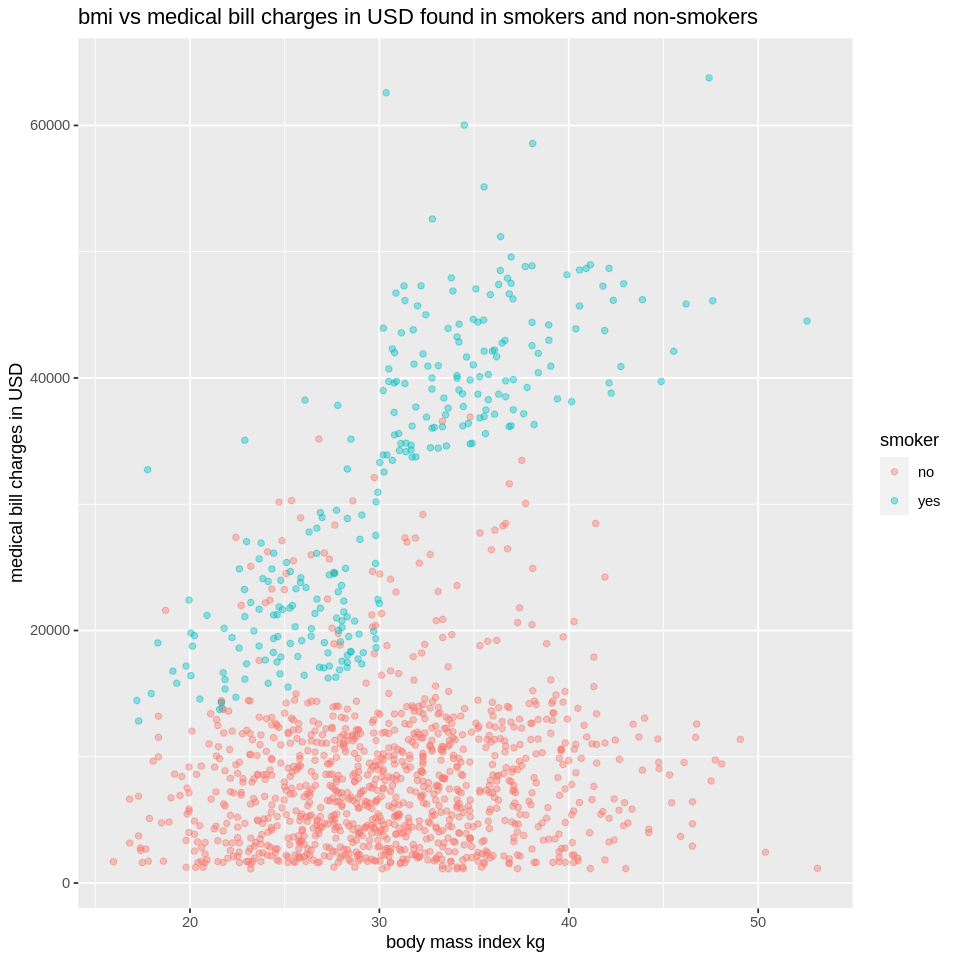

In [51]:
options(repr.plot.width = 8, repr.plot.height = 8) #Remember to set your plot sizes to an appropiate size

smoke_plot <- insurance |>
    ggplot(aes(x = bmi, y = charges, color = smoker)) + 
        geom_point(alpha = 0.4) + # Deals with the transparency of the points, set it to an appropiate value
        labs(color = "smoker") +
        xlab("body mass index kg") +
        ylab("medical bill charges in USD") +
        ggtitle("bmi vs medical bill charges in USD found in smokers and non-smokers")

smoke_plot

In [52]:
# Most of the tests for this question are hidden. You have to decide whether you've created a good visualization!
# here's one test to at least ensure you named the plot object correctly:
expect_true(exists("smoke_plot"))


**Question 1.9.0** (Analyzing the Graph) True or False: 
<br> {points: 1}

Smokers generally have a lower BMI than non-smokers. 

*Assign your answer to an object called `answer1.9.0`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [53]:
answer1.9.0 <- "false"

In [54]:
test_1.9.0()

Test passed 🥳
[1] "Success!"


**Question 1.9.1** (Analyzing the Graph) True or False: 
<br> {points: 1}

Smokers generally have higher medical charges than non-smokers.

*Assign your answer to an object called `answer1.9.1`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [55]:
answer1.9.1 <- "true"

In [56]:
test_1.9.1()

Test passed 🎊
[1] "Success!"


**Question 1.10**
<br> {points: 1}

Finally, create a bar graph that displays the proportion of smokers for both females and males in the data set. Use sex as the horizontal axis, and colour the bars to differentiate between smokers / nonsmokers. This could, for example, be used help us determine whether we should consider smoking behaviour when exploring whether there is a relationship between sex and medical costs.

*Assign your answer to an object called `bar_plot`. Make sure to label your axes appropriately.*

>*Note - many historical datasets treated sex as a variable where the possible values are only binary: male or female. This representation in this question reflects how the data were historically collected and is not meant to imply that we believe that sex is binary.*

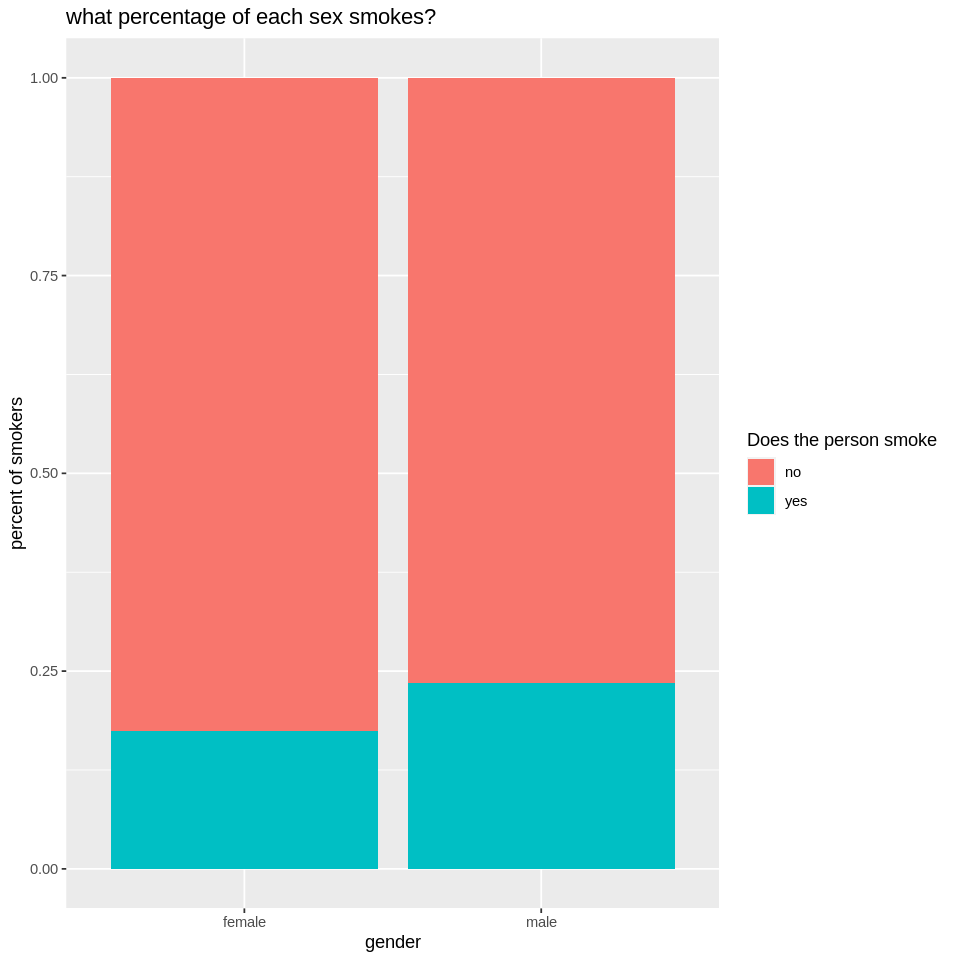

In [62]:
bar_plot <- insurance |>
    ggplot(aes(x = sex, fill = smoker)) + 
    geom_bar(position = 'fill') + 
    xlab("gender") +
    ylab("percent of smokers") +
    labs(fill = "Does the person smoke") + 
    ggtitle("what percentage of each sex smokes?")

bar_plot

In [63]:
test_1.10()

Test passed 😀
Test passed 🎊
Test passed 🎊
Test passed 😸
Test passed 🥇
Test passed 🥇
[1] "Success!"


**Question 1.11**
<br> {points: 1}

Based on the graph, is the proportion of smokers higher amongst men or women?

*Assign your answer to an object called `answer1.11`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"male"` or `"female"`).*

In [64]:
answer1.11 <- "male"

In [65]:
test_1.11()

Test passed 🎉
[1] "Success!"


## 2. Color Palettes (beyond the defaults)
{points: 1}

In the worksheet and this tutorial, you have seen the same colours again and again. These are from the default `ggplot2` color palette. What if you want different colors? We can do this! In R, one of the libraries that provides altenative color palettes is the `RColorBrewer` library. 

For this question:

1. Load the `RColorBrewer`library
2. Print the list of palettes available for you with the `display.brewer.all()` function (you can also print out a list of color blind friendly palettes with `display.brewer.all(colorblindFriendly = T)`).
3. Use the chart you created in Q1.10 and change the color pallette to your favourite from `RColorBrewer`. Remember that instead of recreating the entire chart from scratch, you can use the `bar_plot` variable you already created and just add the color palette change with the `+` operator (it is also fine if you prefer to copy all the code).
    - For the fill aesthetic with categorical variable the function is: `scale_fill_brewer(palette = '...')`
    - For the fill aesthetic with numeric variable the function is: `scale_fill_distiller(palette = '...')`

You can look more in depth into the documentation of the `scale_fill_*` functions here: https://ggplot2.tidyverse.org/reference/scale_brewer.html.  Optionally, you can also use this [color blindness simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/) to check if your visualization is color blind friendly


*Assign your answer to an object called `bar_plot_palette`.*

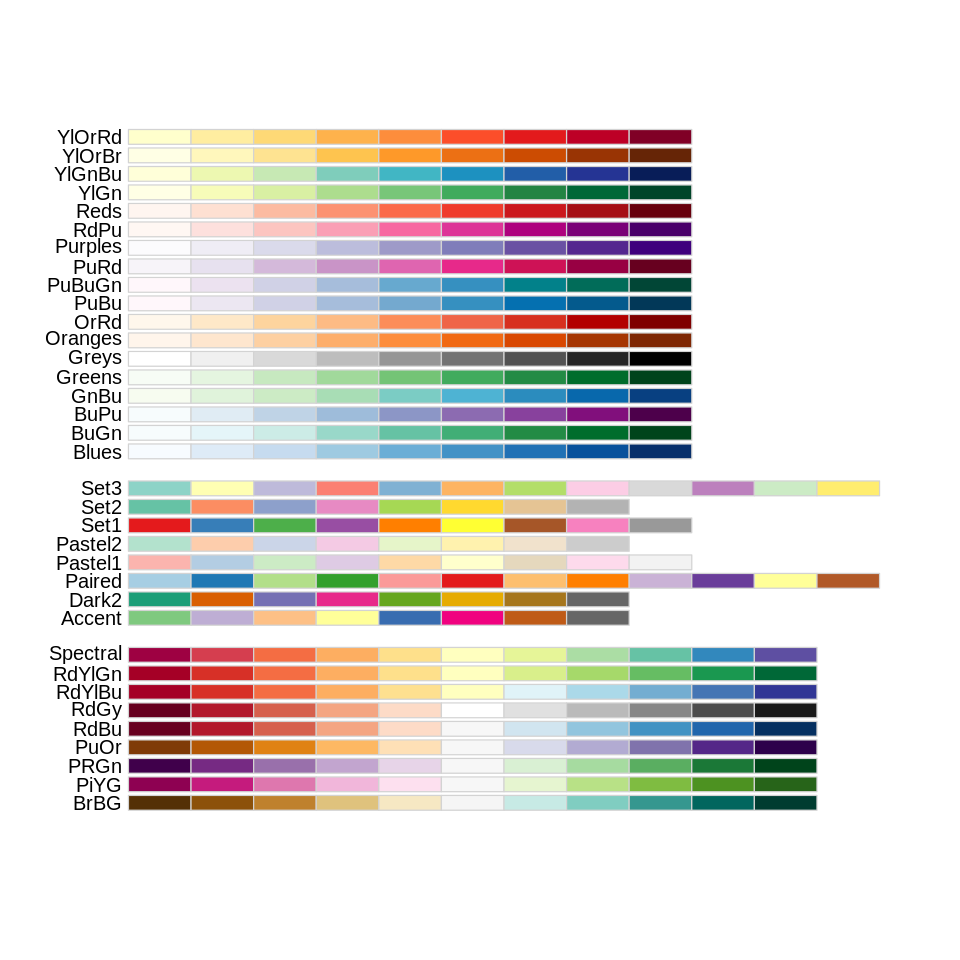

In [66]:
## Run this cell and to explore the RColorBrewer features (step 1 & 2 above)
library(RColorBrewer)
display.brewer.all()

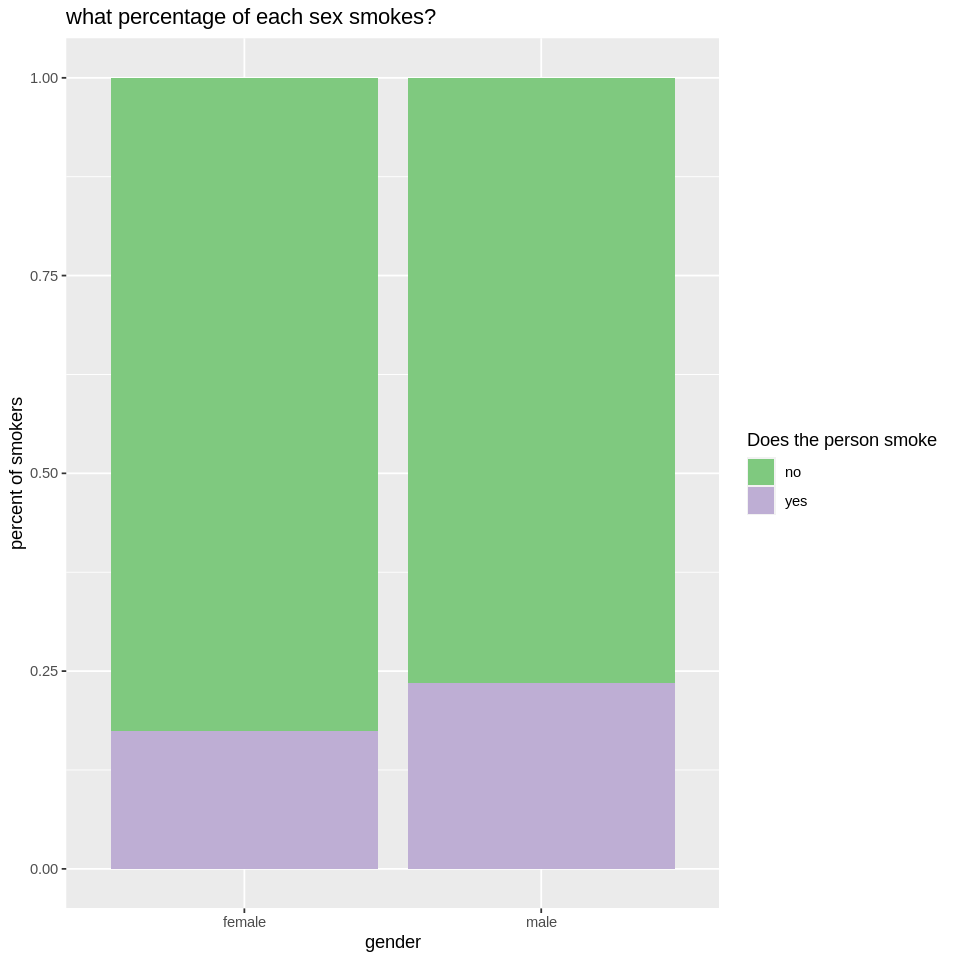

In [70]:
bar_plot_palette <- bar_plot + 
scale_fill_brewer(palette = 'Accent')

bar_plot_palette

In [92]:
test_2()

Test passed 😸
Test passed 😸
Test passed 😀
Test passed 🎉
Test passed 🥇
Test passed 🥇
Test passed 🎉
[1] "Success!"


## 3. Fast-Food Chains in the United States (Continued)
<br> {points: 3}

In `worksheet_viz`, we explored this data set through some visualizations. Now, it is is all up to you. The goal of this assignment is to create **one** plot that can help you figure out which restaurant to open and where! Your goal is the same as in the worksheet: to figure out which fast food chain to open and figure out which state would be the least competitive.

After creating your visualization you need to write a paragraph explaining your visualization and why you chose it. Also, explain your conclusion from the visualization and reasoning as to how you came to that conclusion. You can use properly-cited outside information here to help support your reasoning (but **do not** download and analyze any data from an outside source in this notebook -- our autograder will not be able to see it). Finally, if there is some way that you could improve your visualization, but don't yet know how to do it, please explain what you would do if you knew how.

In answering this question, there is no need to restrict yourself to the west coast of the USA. Consider all states that you have data for. You have a variety of graphs to choose from, but before starting the assignment, discuss with a partner which plot would be the most optimal to answer this question.

     "After creating your visualization you need to write a paragraph explaining your visualization and why you chose it. Also, explain your conclusion from the visualization and reasoning as to how you came to that conclusion. If you need to bring in outside information to help you answer your question, please feel free to do so.  Finally, if there is some way that you could improve your visualization, but don't yet know how to do it, please explain what you would do if you knew how.\n",

*Note that some restaurant names are spelled incorrectly in data. For the purpose of this exercise you can ignore this and only count the spelling with the most entries for each restaurant.*

<img src="mcdonalds.jpg" width = "600"/>


Hint: The function `pull` from the `dplyr` package selects a column in a data frame and transforms it into a vector. Note: There are different ways you can complete this question so you don't necessarily need to use `pull` (you may find a solution without using it) but it may be helpful.

Rows: 10000 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, st

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


st,locations
<chr>,<int>
MD,1
MI,1
NE,1
NJ,1
TN,1


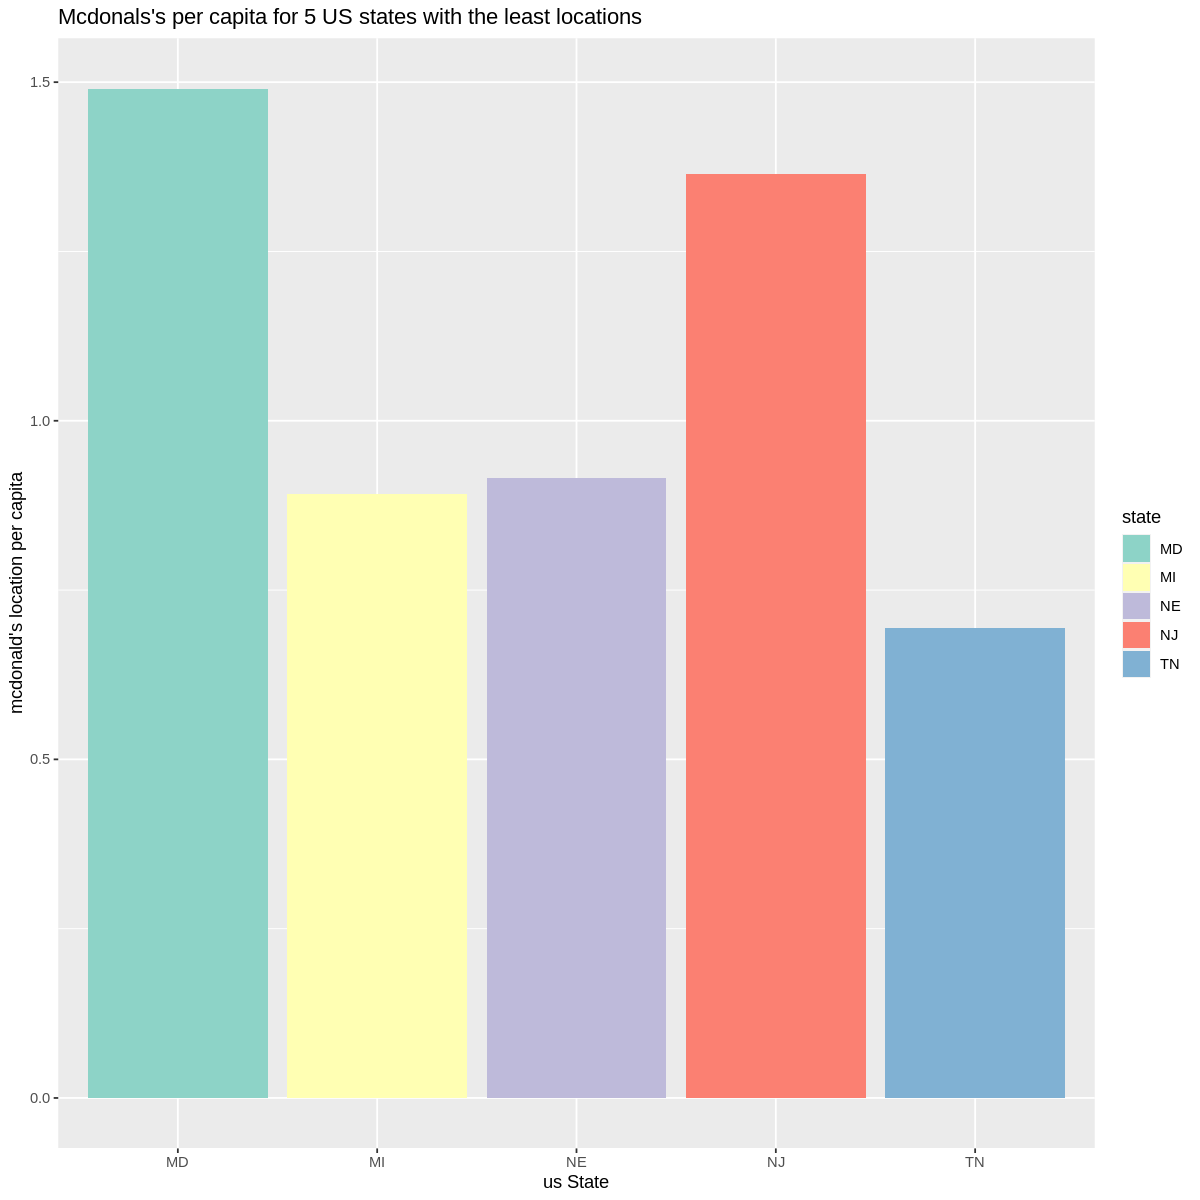

In [10]:
fast_food <- read_csv("data/fast_food.csv")

top_restaurants <- fast_food |>
    group_by(name) |>
    summarize(count = n()) |>
    slice_max(count, n = 3)
#top_restaurants
least_mc <- fast_food |>
    filter(name %in% c ("Mcdonald's")) |>
    group_by(st) |>
    summarize (locations = n()) |>
    arrange(desc(locations)) |>
    slice_tail(n = 5)
least_mc

population <- c(0.671, 1.122, 1.093, 0.733, 1.440)

mc_capita <- mutate(least_mc, mc_capita = locations/population)

fast_food_plot <- mc_capita |>
            ggplot(aes(x = st, y = mc_capita, fill = st)) + 
            geom_bar(stat = "identity") + 
            labs(fill = "state") + 
            xlab("us State") + 
            ylab("mcdonald's location per capita") + 
            scale_fill_brewer(palette = 'Set3') + 
            ggtitle("Mcdonals's per capita for 5 US states with the least locations")

options(repr.plot.width = 10, repr.plot.height = 10)

fast_food_plot



*Write a paragraph explaining your visualization and why you chose it. Also explain your conclusion from the visualization and reasoning as to how you came to that conclusion. You can use properly-cited outside information here to help support your reasoning (but **do not** download and analyze any data from an outside source in this notebook -- our autograder will not be able to see it). Finally, if there is some way that you could improve your visualization, but don't yet know how to do it, please explain what you would do if you knew how.*

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

In [ ]:
source("cleanup.R")